In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
data = pd.read_csv(url, names=column_names)

# Preprocess the dataset (replace ? with NaN and drop them)
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Splitting variables
X = data.iloc[:, :-1]
y = data.iloc[:, -1].apply(lambda x: 1 if x > 0 else 0)  # Transform target to binary

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit RandomForest
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Evaluate model
y_pred = grid_rf.predict(X_test)
y_prob = grid_rf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'Precision-Recall AUC: {pr_auc:.4f}')

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Heart Disease Prediction')
plt.legend()
plt.show()


Accuracy (SVC): 0.8833
ROC AUC (SVC): 0.9468
Precision-Recall AUC (SVC): 0.9407


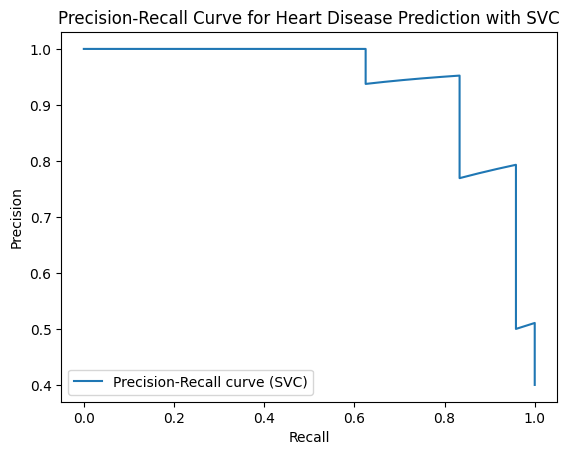

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# Using SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Trying an alternative model
svc = SVC(probability=True, random_state=42)
svc.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred_svc = svc.predict(X_test)
y_prob_svc = svc.predict_proba(X_test)[:, 1]

# Calculate accuracy and AUC metrics
accuracy_svc = accuracy_score(y_test, y_pred_svc)
roc_auc_svc = roc_auc_score(y_test, y_prob_svc)
precision_svc, recall_svc, _ = precision_recall_curve(y_test, y_prob_svc)
pr_auc_svc = auc(recall_svc, precision_svc)

# Print metrics
print(f'Accuracy (SVC): {accuracy_svc:.4f}')
print(f'ROC AUC (SVC): {roc_auc_svc:.4f}')
print(f'Precision-Recall AUC (SVC): {pr_auc_svc:.4f}')

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall_svc, precision_svc, label='Precision-Recall curve (SVC)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Heart Disease Prediction with SVC')
plt.legend()
plt.show()
